In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 90%;
}
</style>

# Analiza i bazy danych

## Eksploracja danych

### dr hab. inż. Jerzy Baranowski, Prof. AGH

# Eksploracja danych

- bardziej sztuka niż nauka
- ogólny zestaw umiejętności a nie zamknięta procedura


# Oryginalny pomysł - Tukey
![](img/tukey.png)

# Cele eksploracji danych


- Proponowanie nowych hipotez o obserwowanych w danych zależnościach
- Sprawdzanie zgodności danych z założeniami modeli statystycznych
- Wybranie adekwatnego do charakteru danych zestawu narzędzi i technik analizy

Tukey (źródło Wikipedia)

# Cele eksploracji danych

Podstawowym celem EDA jest maksymalizacja wglądu analityka w zestaw danych i w podstawową strukturę zbioru danych, przy jednoczesnym zapewnieniu wszystkich konkretnych elementów, które analityk chciałby wyodrębnić z zestawu danych, takich jak:

- dobrze dopasowany, oszczędny model
- lista wartości odstających
- poczucie solidności wniosków
- szacunki parametrów
- niepewności dotyczące tych szacunków
- uporządkowana lista ważnych czynników
- wnioski dotyczące tego, czy poszczególne czynniki są istotne statystycznie
- optymalne ustawienia

*NIST Engineering Statistics Handbook*

# Cele eksploracji danych


  Analiza danych eksploracyjnych ma miejsce w „montażowni” projektu badawczego lub dowolnego badania opartego na danych. EDA to proces „wstępnego cięcia” do analizy danych, którego cel jest bardzo podobny do tego w sali montażowej filmu.

*R. Peng Exploratory data analysis*

# Cele eksploracji danych
EDA to cykl iteracyjny. W nim:

- Generuj pytania dotyczące swoich danych.
- Wyszukaj odpowiedzi, wizualizując, przekształcając i modelując swoje dane.
- Wykorzystaj zdobytą wiedzę, aby zawęzić swoje pytania i / lub wygenerować nowe pytania.

*G. Grolemund, H. Wickham - R for Data Analysis*

# Obsługa danych

Podstawą współczesnej analizy w Pythonie jest pakiet ``pandas`` (Python data analysis library).

https://pandas.pydata.org/

Za jego pomocą możemy w łatwy sposób obsługiwać dane tabelaryczne w formie obiektów typu ``data frame`` a także wizualizacja danych.

In [2]:
import pandas as pd
tips=pd.read_csv('tips.csv')
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


# Początki analizy
Na początek zawsze dobrze popatrzyc ile danych mamy i co to za dane.

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   obs      244 non-null    int64  
 1   totbill  244 non-null    float64
 2   tip      244 non-null    float64
 3   sex      244 non-null    object 
 4   smoker   244 non-null    object 
 5   day      244 non-null    object 
 6   time     244 non-null    object 
 7   size     244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


# Wstępne statystyki
Dane numeryczne również można przeanalizować

In [4]:
tips.describe() 

,obs,totbill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,122.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,1.000000,3.070000,1.000000,1.000000
25%,61.750000,13.347500,2.000000,2.000000
50%,122.500000,17.795000,2.900000,2.000000
75%,183.250000,24.127500,3.562500,3.000000
max,244.000000,50.810000,10.000000,6.000000


Albo wszystkie

In [5]:
tips.describe(include='all')

,obs,totbill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,M,No,Sat,Night,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,122.500000,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,70.580923,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,1.000000,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,61.750000,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,122.500000,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,183.250000,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [6]:
mtcars=pd.read_csv('mtcars.csv',delimiter=' ;',decimal=',')

In [7]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
mtcars.describe(include='all')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota Corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,NaN,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,NaN,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,NaN,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,NaN,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,NaN,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000


# Techniki wizualizacji

## Histogram
Estymata rozkładu zmiennej

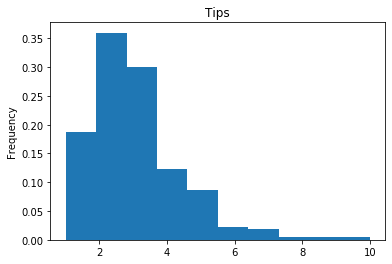

In [52]:
import matplotlib.pyplot as plt
tips.tip.plot(kind='hist',title='Tips',density=True,bins=10)
plt.show()

## Estymator jądrowy
Gładka estymata rozkładu prawdopodobieństwa wykorzystująca dane

$$
p(x)=\sum_{i=0}^n K_i(x-x_i)
$$

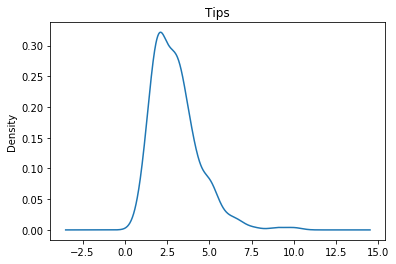

In [10]:
tips.tip.plot(kind='density',title='Tips')
plt.show()

## Dystrybuanta empiryczna (ECDF)
Estymacja dystrybuanty, podobna do histogramu kumulatywnego (ale bez grupowania)


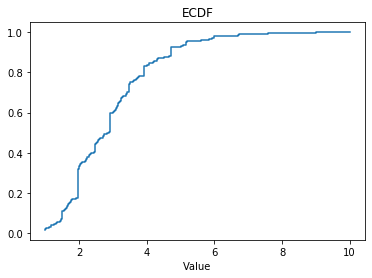

In [11]:
def ECDF(series):
    ser=series.value_counts().sort_index().cumsum()/len(series)
    ser.index.name='Value'
    ser.name='Probability'
    return ser
ECDF(tips.tip).plot(title='ECDF',drawstyle="steps")
plt.show()

## Wykres pudełkowy
Prosta wizualizacja rozkładu z oznaczeniem wartości odstających

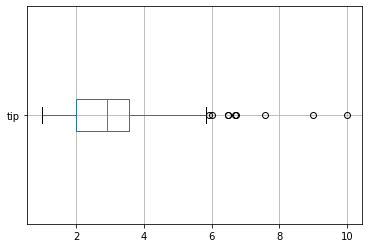

In [12]:
tips[['tip']].boxplot(vert=False)
plt.show()


## Wykres punktowy - ang. *scatterplot* 

Najpopularniejszy wykresem w analizie danych - umożliwia analizę wzajemnych zależności między zmiennymi


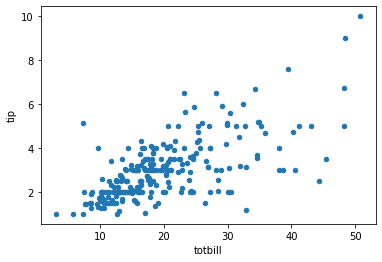

In [13]:
import matplotlib.pyplot as plt

tips.plot.scatter(x='totbill',y='tip',marker='o')
plt.show()


Pandas ma ograniczone możliwości wizualizacyjne. Generalnie matplotlib pozwala na więcej:

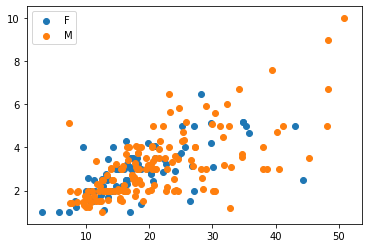

In [14]:
fig, ax = plt.subplots()
for c, df_ in tips.groupby('sex'):
    ax.scatter(df_['totbill'], df_['tip'], label=c)
ax.legend()

# Pakiety wizualizacjne 
Zasadniczo wizualizację umożliwia wiele pakietów, które są dużo łatwiejsze w użyciu.

# Seaborn
![](img/seaborn.png)


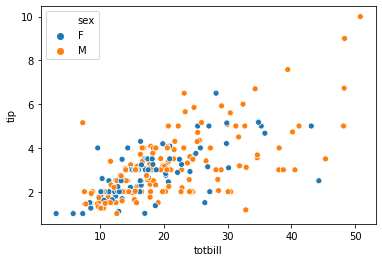

In [15]:
import seaborn as sns
ax = sns.scatterplot(x="totbill", y="tip", hue="sex",data=tips)

Popularny, miesza trochę w ``matplotlib``'ie. 

# Plotnine
![](img/plotnine.png)


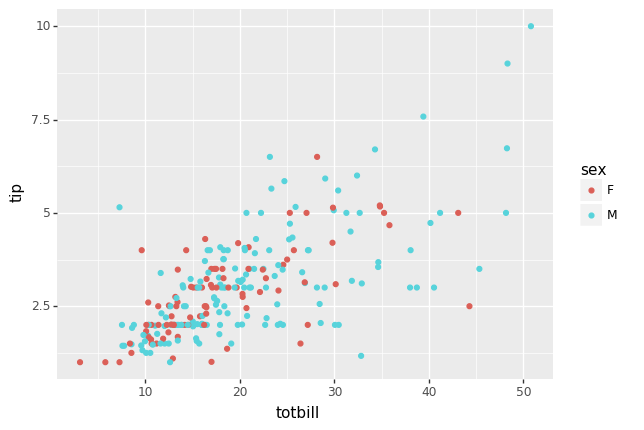

<ggplot: (8770660450997)>

In [16]:
import plotnine as p9
p=p9.ggplot(p9.aes(x='totbill', y='tip'),data=tips)
p+p9.geom_point(p9.aes(color='sex'))

Wzorowany na ``ggplot2`` z R. Wymaga przyzwyczajenia się do grammar of graphics.

## Pakiety
Pandas, seaborn i plotnine są pakietami ściśle związanym z matplotlibem. Wszystko w nich można zrobić w matplotlibie ale jest łatwiej/ładniej.

# Plotly

![](img/plotly.png)


In [17]:
import plotly.express as px
fig = px.scatter(tips, x="totbill", y="tip", color="sex",height=400)
fig.show()

Chwilowo najbardziej technicznie rozwinięty. Dobry do grafiki webowej. Działa na iPadzie.  ``plotly.express`` - moduł do prototypowania analizy.

# Long data
Dane w postaci tidy, są zawsze long. Postać long pozwala na wykorzystanie wszystkich możliwości pakietów wizualizacyjnych.

In [18]:
wide_df = pd.DataFrame(dict(Month=["Jan", "Feb", "Mar"], London=[1,2,3], Paris=[3,1,2]))
wide_df

,Month,London,Paris
0,Jan,1,3
1,Feb,2,1
2,Mar,3,2


In [19]:
tidy_df = wide_df.melt(id_vars="Month")
tidy_df

,Month,variable,value
0,Jan,London,1
1,Feb,London,2
2,Mar,London,3
3,Jan,Paris,3
4,Feb,Paris,1
5,Mar,Paris,2


## Wykres słupkowy (bar graph)

Narzędzie do wizualizacji danych dyskretnych. 

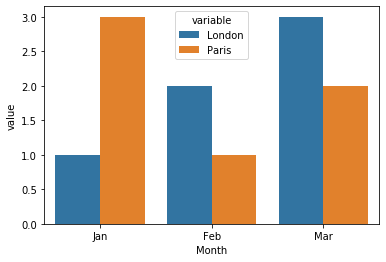

In [45]:
sns.barplot(data=tidy_df, x="Month", y="value", hue="variable")
plt.show()

# Analiza i bazy danych

## Eksploracja danych - Case studies

### dr hab. inż. Jerzy Baranowski, Prof. AGH

# Napiwki
Zebrane dane z grupy wizyt w restauracji.

Brak eksploracji tylko zastosowanie uczenia maszynowego zaowocował prostym modelem regresyjnym wiążącym liczebność grupy z procentową wysokością napiwku.

Przyjrzyjmy się danym dokładniej.

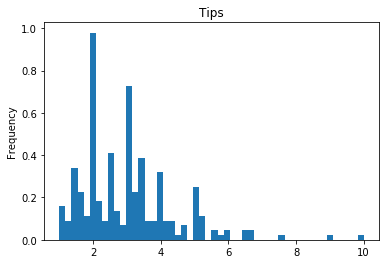

In [61]:
tips.tip.plot(kind='hist',title='Tips',density=True,bins=50)
plt.show()

Ludzie zaokrąglają napiwki - czy nie należy tego uwzględnić w analizie?

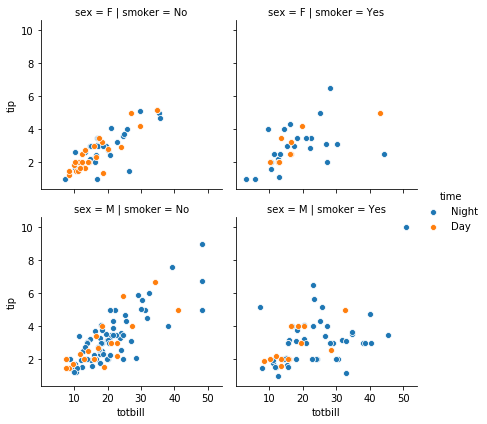

In [60]:
g = sns.FacetGrid(tips, hue="time",  row="sex",col='smoker')
g.map(sns.scatterplot, "totbill", "tip")
g.add_legend()
plt.show()

# Pasażerowie Titanica
Zestaw danych z Kaggle'a


In [28]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic.dropna().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [31]:
titanic.dropna(subset=['Age']).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Brakujące dane

Brakuje dużo danych, w szczególności numeru kabiny i wieku.
Co zrobić?

## Zanieczyszczenia
Obserwacja koncentracji zanieczyszczeń estymowanych z obracjaącego się czujnika.


In [33]:
df0=pd.read_csv('polution_observed_data.csv')
df=df0[['Angle','Concentration']]
df.head()

,Angle,Concentration
0,0.280007,0.109304
1,0.306243,0.061208
2,0.186074,0.124397
3,0.339515,0.136913
4,0.198521,0.032704


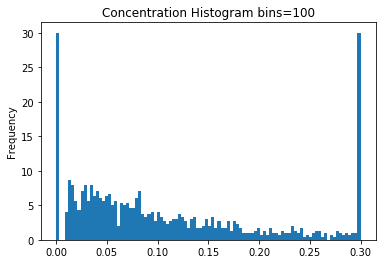

In [62]:
series=df.Concentration
n=100
series.plot(kind='hist',bins=n,density=True,title=series.name+' Histogram bins={}'.format(n))
plt.show()

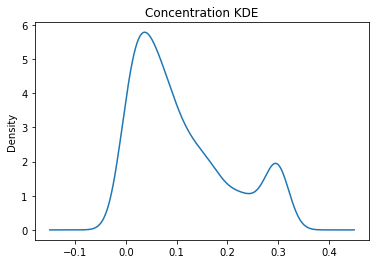

In [35]:
series.plot(kind='density',title=series.name+' KDE')
plt.show()

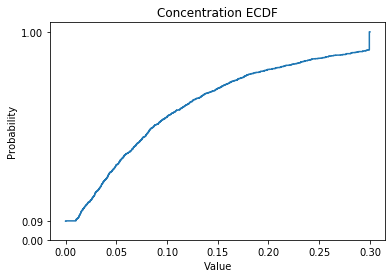

In [36]:
ax=ECDF(series).plot(title=series.name+' ECDF',drawstyle="steps")
ax.set_ylabel(ylabel='Probability')
ax.set_yticks([0, ECDF(series).min(),1])
plt.show()

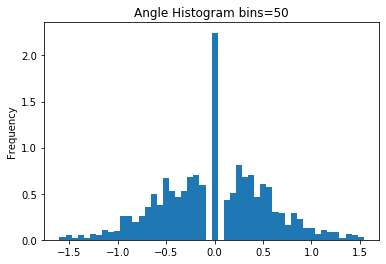

In [63]:
series=df.Angle
n=50
series.plot(kind='hist',bins=n,density=True,title=series.name+' Histogram bins={}'.format(n))
plt.show()

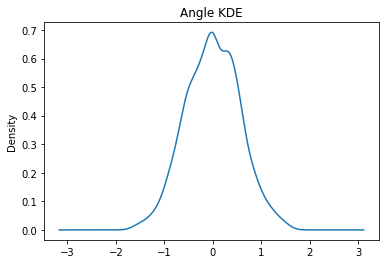

In [38]:
series.plot(kind='density',title=series.name+' KDE')
plt.show()

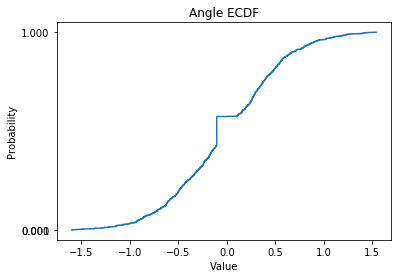

In [39]:
ax=ECDF(series).plot(title=series.name+' ECDF',drawstyle="steps")
ax.set_ylabel(ylabel='Probability')
ax.set_yticks([0, ECDF(series).min(),1])
plt.show()

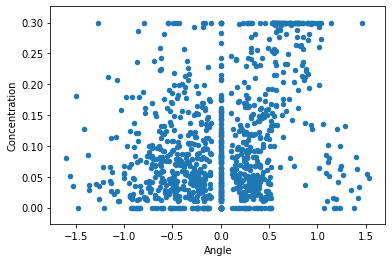

In [40]:
df.plot(x='Angle',y='Concentration',kind='scatter')
plt.show()

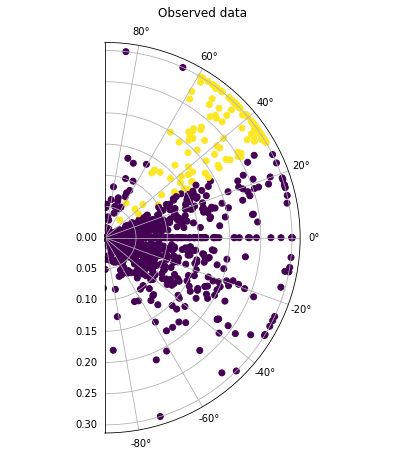

In [41]:
fig,ax = plt.subplots(1,1,figsize=(7, 8),subplot_kw=dict(polar=True))

ax.scatter(df0.Angle, df0.Concentration,c=df0.Poluted)
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_title('Observed data')


plt.show()

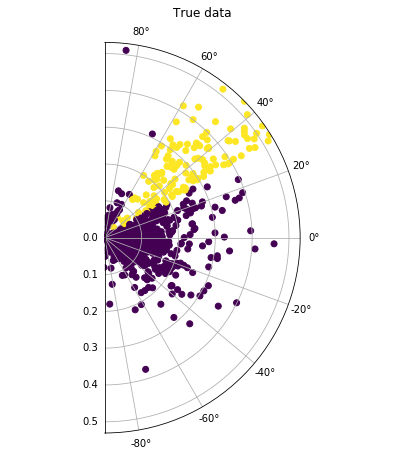

In [42]:
df1=pd.read_csv('polution_true_data.csv')
fig,ax = plt.subplots(1,1,figsize=(7, 8),subplot_kw=dict(polar=True))

ax.scatter(df1.Angle, df1.Concentration,c=df1.Poluted)
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_title('True data')


plt.show()


plt.show()